In [2]:
import os
import warnings

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import numpy as np
import matplotlib.colors as colors
import glob

SuppressWarnings = True
SuppressPlots = False

## Suppress Warnings
if SuppressWarnings:
    warnings.filterwarnings("ignore")
if SuppressPlots:
    import matplotlib
    matplotlib.use("Agg")

In [3]:
def plot_slice(X, Y, Z, title):
    fig = plt.figure(figsize=(11, 6.5))

    cmap = plt.get_cmap('coolwarm')
    norm = colors.Normalize(vmin=-2, vmax=38)

    # Plot the data using contourf
    cs = plt.contourf(X, Y, Z, levels=10, cmap=cmap, norm=norm)

    cbar = plt.colorbar(cs, shrink=0.6, orientation='horizontal', label='SST (Celcius)')
    plt.title(title)
    plt.show()

In [4]:
# Define the initial level
initial_level = 20

# Create an empty list to store the new levels
new_levels = []

# Generate new levels with a 20-unit spacing
current_level = initial_level
while current_level <= 905:  # Adjust the upper limit as needed
    new_levels.append(current_level)
    current_level += 15

# Convert the list of levels to a numpy array
new_levels = np.array(new_levels)

# Print the new levels to verify
print(new_levels)

[ 20  35  50  65  80  95 110 125 140 155 170 185 200 215 230 245 260 275
 290 305 320 335 350 365 380 395 410 425 440 455 470 485 500 515 530 545
 560 575 590 605 620 635 650 665 680 695 710 725 740 755 770 785 800 815
 830 845 860 875 890 905]


## #1 CCSM4 (B40) Annual Mean Pliocene Upper Ocean Temperature

In [13]:
# Setting the file path and name
path1 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname1 = 'CCSM4_plio.nc'
output = '/glade/u/home/nwrye/OceanTemps_Compiles/vert_regridded/'

# Open the dataset using xarray and concatenate the dimensions
ds1 = xr.open_dataset(path1 + fname1)

# Interpolate data to the new vertical levels
interpolated_data = ds1['TEMP'].interp(lev=new_levels)

# Update the dataset with the new vertical levels
ds1['lev'] = new_levels

ds1.to_netcdf(output+fname1)
ds1

<xarray.Dataset>
Dimensions:  (lat: 181, lev: 60, lon: 360)
Coordinates:
    time     object ...
  * lev      (lev) int64 20 35 50 65 80 95 110 ... 815 830 845 860 875 890 905
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (lev, lat, lon) float64 ...

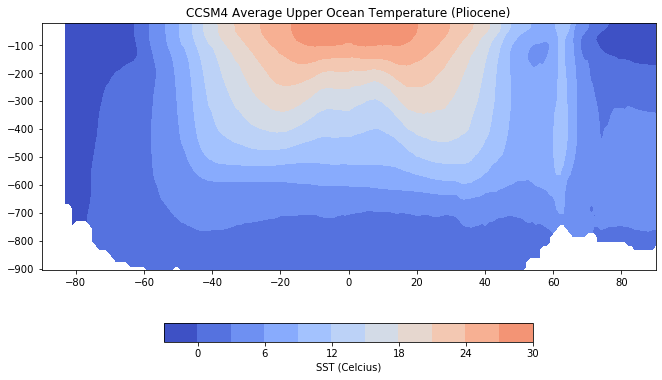

In [14]:
# Plotting
plot_slice(
    ds1.lat,
    -ds1['lev'],
    ds1['TEMP'][:,:,:].mean(dim='lon'),
    title="CCSM4 Average Upper Ocean Temperature (Pliocene)"
)

## #2 CESM 1.2 (b.e12) Annual Mean Pliocene Upper Ocean Temperature

In [11]:
# Setting the file path and name
path2 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname2 = 'CESM1.2_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds2 = xr.open_dataset(path2 + fname2)

# Interpolate data to the new vertical levels
interpolated_data = ds2['TEMP'].interp(lev=new_levels)

# Update the dataset with the new vertical levels
ds2['lev'] = new_levels
ds2

<xarray.Dataset>
Dimensions:  (lat: 181, lev: 60, lon: 360)
Coordinates:
  * lev      (lev) int64 20 35 50 65 80 95 110 ... 815 830 845 860 875 890 905
    time     object ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

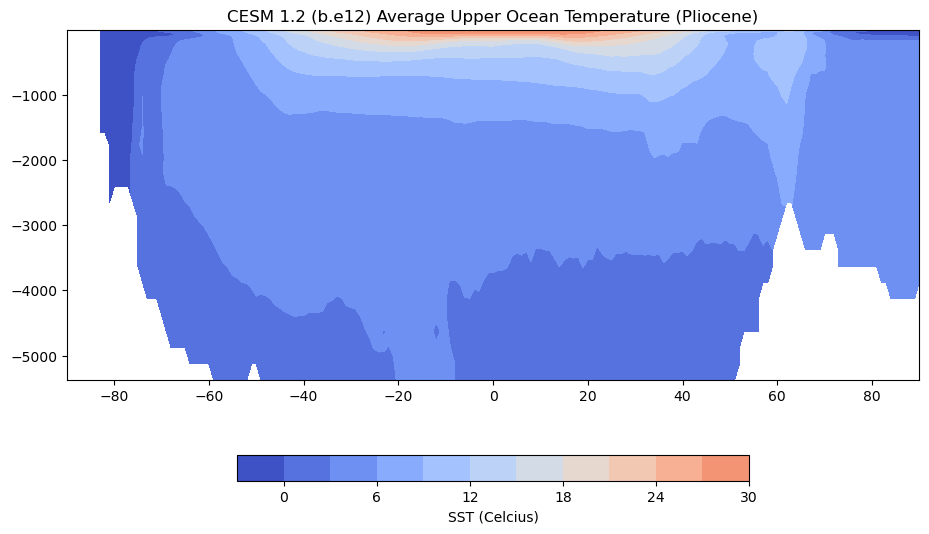

In [10]:
# Plotting
plot_slice(
    ds2.lat,
    -ds2['lev'],
    ds2['TEMP'][:,:,:].mean(dim='lon'),
    title="CESM 1.2 (b.e12) Average Upper Ocean Temperature (Pliocene)"
)

## #3 CESM2 (b.e12) Annual Mean Pliocene Upper Ocean Temperature

In [8]:
# Setting the file path and name
path3 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname3 = 'CESM2_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds3 = xr.open_dataset(path3 + fname3)
ds3

<xarray.Dataset>
Dimensions:  (lev: 60, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
    time     object ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

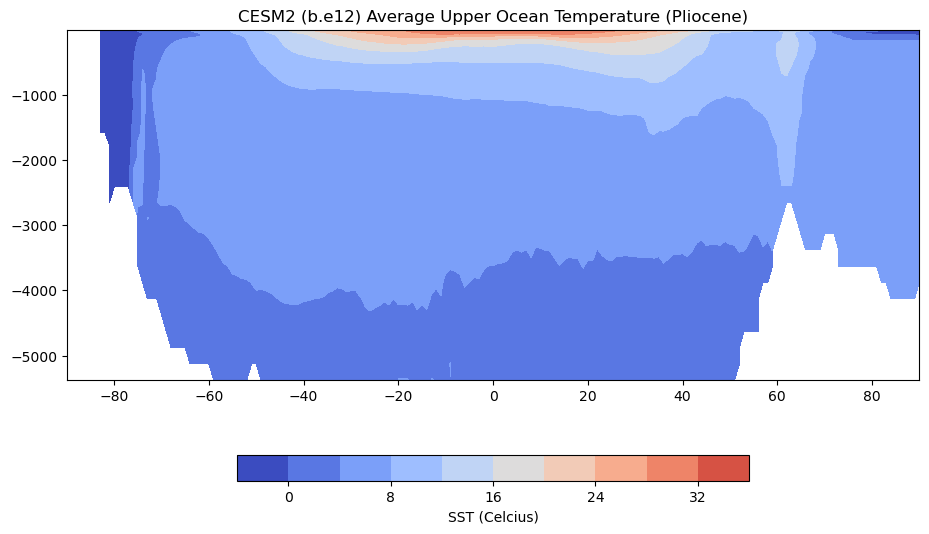

In [12]:
# Plotting
plot_slice(
    ds3.lat,
    -ds3['lev'],
    ds3['TEMP'][:,:,:].mean(dim='lon'),
    title="CESM2 (b.e12) Average Upper Ocean Temperature (Pliocene)"
)

## #4 COSMOS Annual Mean Pliocene Upper Ocean Temperature

In [9]:
# Setting the file path and name
path4 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname4 = 'COSMOS_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds4 = xr.open_dataset(path4 + fname4)
ds4

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

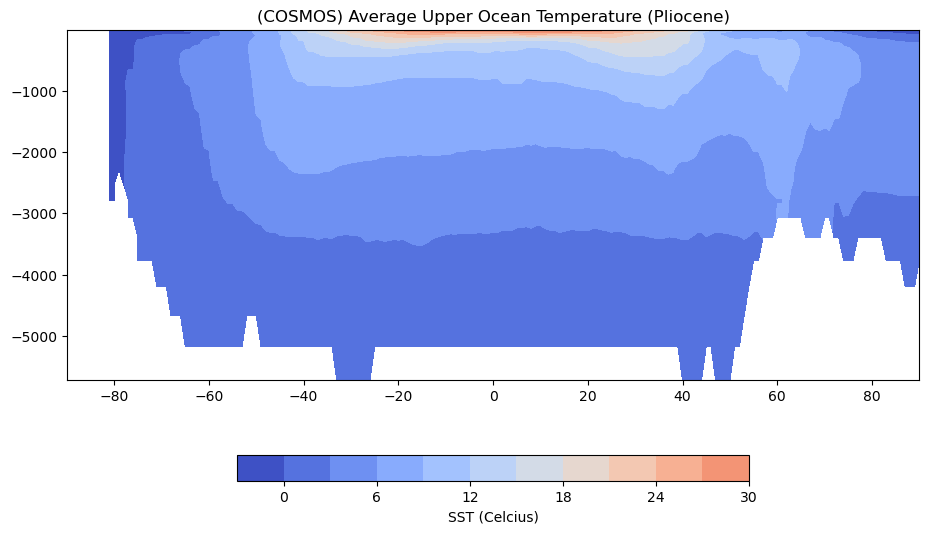

In [15]:
# Plotting
plot_slice(
    ds4.lat,
    -ds4['lev'],
    ds4['TEMP'][:,:,:].mean(dim='lon'),
    title="(COSMOS) Average Upper Ocean Temperature (Pliocene)"
)

## #5 EC-Earth 3.3 Annual Mean Pliocene Upper Ocean Temperature

In [10]:
# Setting the file path and name
path5 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname5 = 'EC_Earth3.3_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds5 = xr.open_dataset(path5 + fname5)
ds5

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

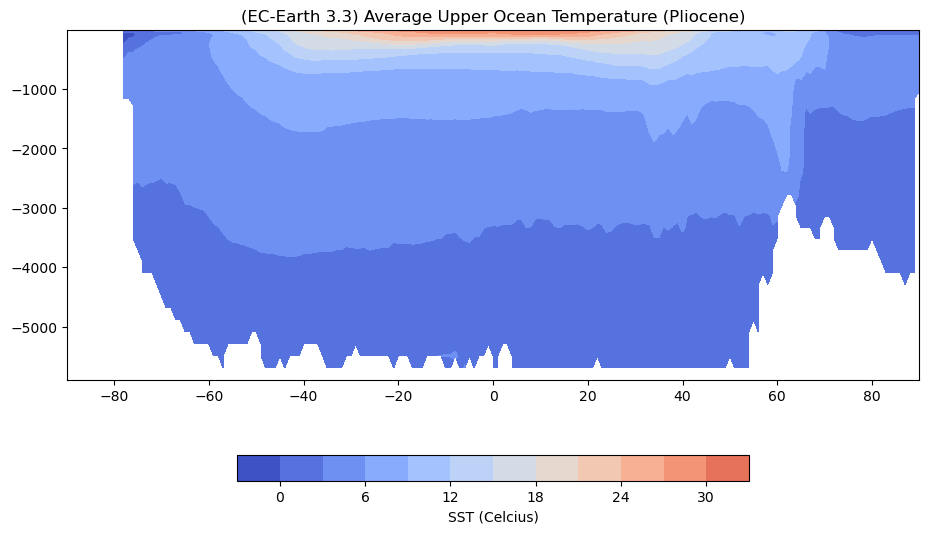

In [17]:
# Plotting
plot_slice(
    ds5.lat,
    -ds5['lev'],
    ds5['TEMP'][:,:,:].mean(dim='lon'),
    title="(EC-Earth 3.3) Average Upper Ocean Temperature (Pliocene)"
)

## #6 HADGEM3 NEW 1997 Annual Mean Pliocene Upper Ocean Temperature

In [12]:
# Setting the file path and name
path6 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname6 = 'HADGEM3_NEW_1997_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds6 = xr.open_dataset(path6 + fname6)
ds6

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

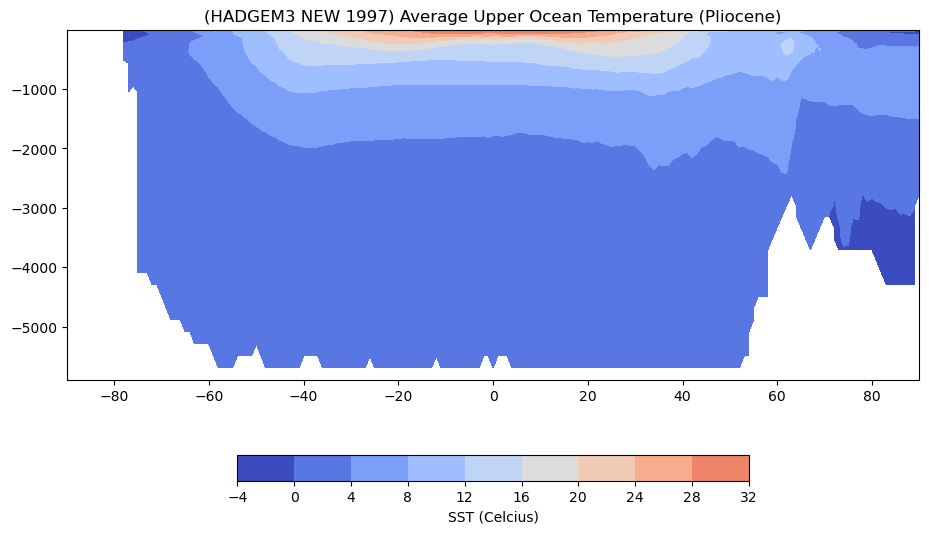

In [19]:
# Plotting
plot_slice(
    ds6.lat,
    -ds6['lev'],
    ds6['TEMP'][:,:,:].mean(dim='lon'),
    title="(HADGEM3 NEW 1997) Average Upper Ocean Temperature (Pliocene)"
)

## #7 IPSLCM5A Annual Mean Pliocene Upper Ocean Temperature

In [13]:
# Setting the file path and name
path7 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname7 = 'IPSLCM5A_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds7 = xr.open_dataset(path6 + fname6)
ds7

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

In [ ]:
# Plotting
plot_slice(
    ds7.lat,
    -ds7['lev'],
    ds7['TEMP'][:,:,:].mean(dim='lon'),
    title="(IPSLCM5A) Average Upper Ocean Temperature (Pliocene)"
)

## #8 IPSLCM5A2 Annual Mean Pliocene Upper Ocean Temperature

In [14]:
# Setting the file path and name
path8 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname8 = 'HADGEM3_NEW_1997_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds8 = xr.open_dataset(path6 + fname6)
ds8

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

In [ ]:
# Plotting
plot_slice(
    ds8.lat,
    -ds8['lev'],
    ds8['TEMP'][:,:,:].mean(dim='lon'),
    title="(IPSLCM5A2) Average Upper Ocean Temperature (Pliocene)"
)

## #9 MIROC4_2004 Annual Mean Pliocene Upper Ocean Temperature

In [15]:
# Setting the file path and name
path9 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname9 = 'MIROC4_2004_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds9 = xr.open_dataset(path9 + fname9)
ds9

<xarray.Dataset>
Dimensions:  (lev: 25, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 22.5 ... 550.0 675.0 825.0 975.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

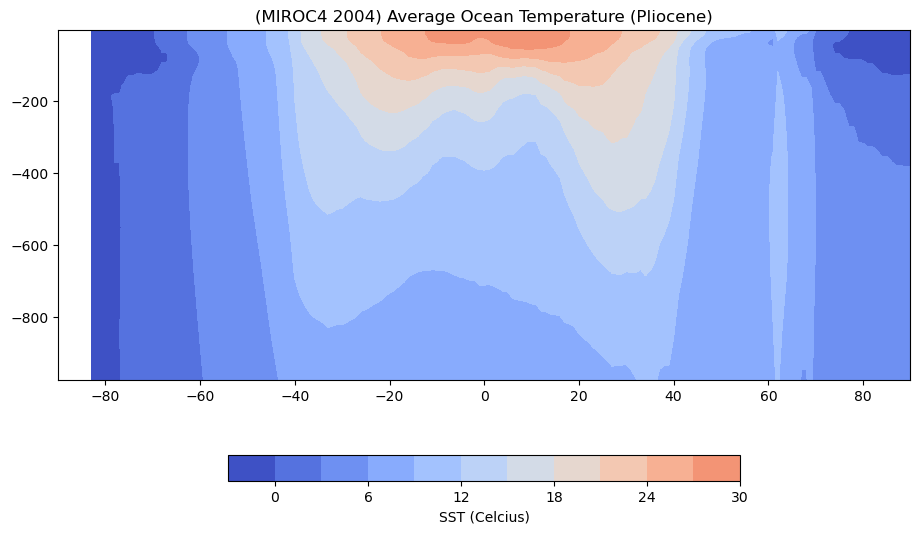

In [21]:
# Plotting
plot_slice(
    ds9.lat,
    -ds9['lev'],
    ds9['TEMP'][:,:, :].mean(dim='lon'),
    title="(MIROC4 2004) Average Ocean Temperature (Pliocene)"
)

## #13 Utrecht CESM1.0.5 Annual Mean Pliocene Upper Ocean Temperature

In [22]:
# Setting the file path and name
path13 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname13 = 'Utrecht_CESM1.0.5_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds13 = xr.open_dataset(path13 + fname13)

# Rename variable z_t to lev
ds13 = ds13.rename({'z_t': 'lev','temp': 'TEMP'})
ds13

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 500.0 1.5e+03 2.5e+03 ... 8.788e+04 9.847e+04
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

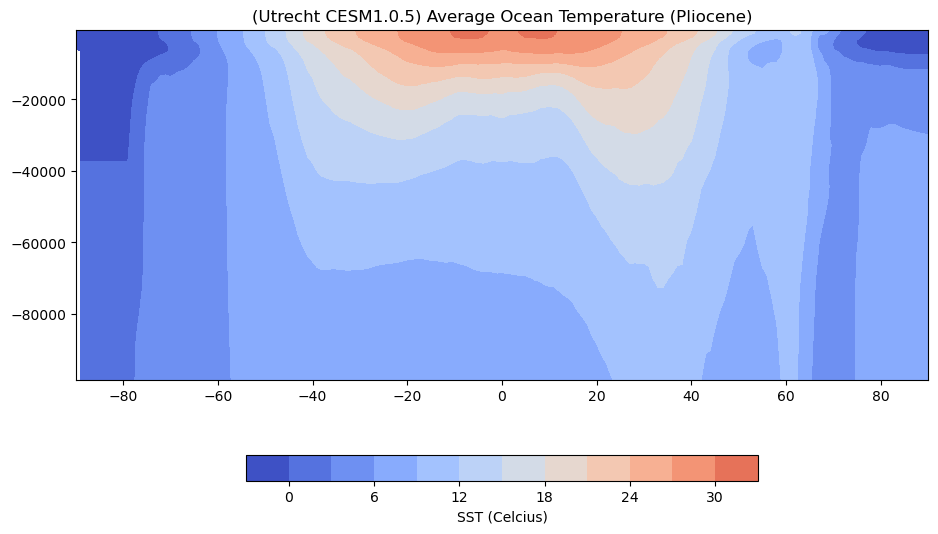

In [24]:
# Plotting
plot_slice(
    ds13.lat,
    -ds13['lev'],
    ds13['TEMP'][:,:, :].mean(dim='lon'),
    title="(Utrecht CESM1.0.5) Average Ocean Temperature (Pliocene)"
)

## #14 LEEDS Annual Mean Pliocene Upper Ocean Temperature

In [5]:
# Setting the file path and name
path14 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname14 = 'LEEDS_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds14 = xr.open_dataset(path14 + fname14)

# Rename variable z_t to lev
ds14 = ds14.rename({'depth_1': 'lev','temp': 'TEMP'})
ds14

<xarray.Dataset>
Dimensions:  (lev: 20, lon: 360, lat: 181)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.1 ... 3.962e+03 4.577e+03 5.192e+03
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (lev, lat, lon) float64 ...

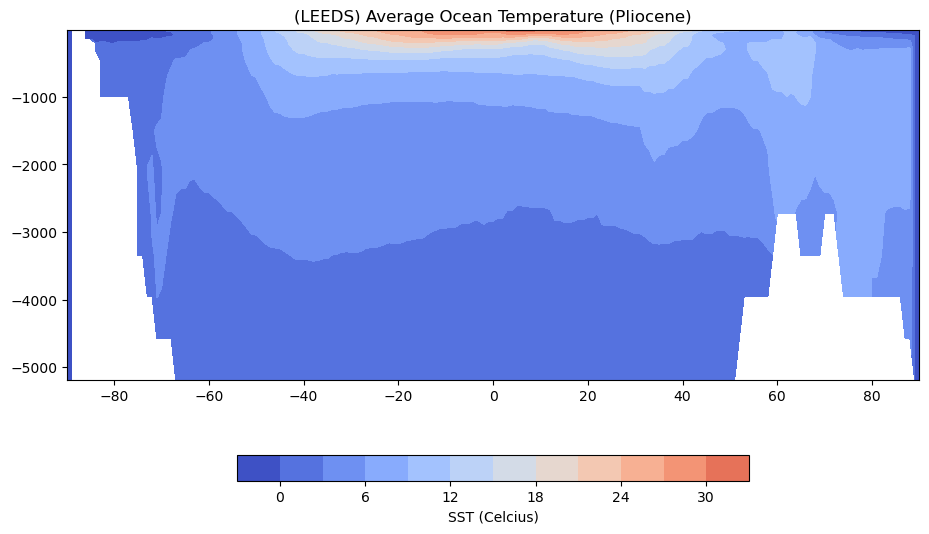

In [6]:
# Plotting
plot_slice(
    ds14.lat,
    -ds14['lev'],
    ds14['TEMP'][:,:,:].mean(dim='lon'),
    title="(LEEDS) Average Ocean Temperature (Pliocene)"
)

## #16 IPSLCM6A_LR Annual Mean Pliocene Upper Ocean Temperature

In [25]:
# Setting the file path and name
path16 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname16 = 'IPSLCM6A_LR_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds16 = xr.open_dataset(path16 + fname16)

# Rename variable z_t to lev
ds16 = ds16.rename({'olevel': 'lev','temp': 'TEMP'})
ds16

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

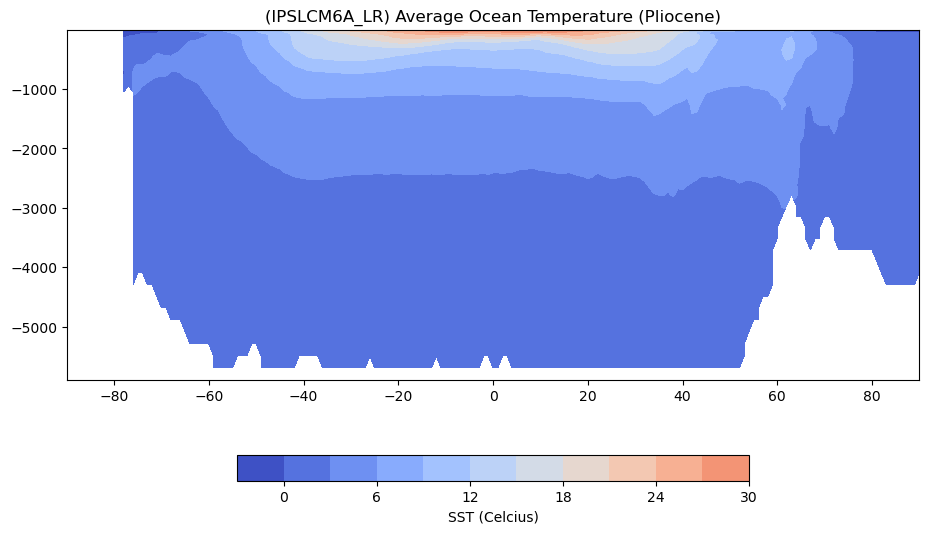

In [26]:
# Plotting
plot_slice(
    ds16.lat,
    -ds16['lev'],
    ds16['TEMP'][:,:, :].mean(dim='lon'),
    title="(IPSLCM6A_LR) Average Ocean Temperature (Pliocene)"
)

## #17 GISS Annual Mean Pliocene Upper Ocean Temperature

In [13]:
# Setting the file path and name
path17 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname17 = 'GISS_plio.nc'

# Open the dataset using xarray and concatenate the dimensions
ds17 = xr.open_dataset(path17 + fname17)
ds17

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 5.0 16.0 29.0 44.0 ... 4.453e+03 4.675e+03 4.897e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

In [12]:
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
file_name = 'GISS_plio.nc'
file_path = output_path + file_name

ds17.to_netcdf(file_path)

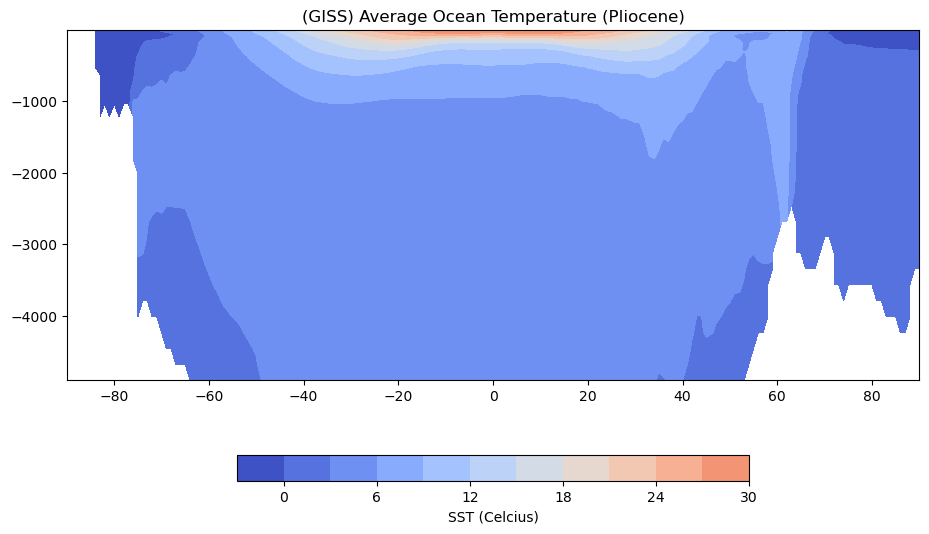

In [10]:
# Plotting
plot_slice(
    ds17.lat,
    -ds17['lev'],
    ds17['TEMP'][:,:, :].mean(dim='lon'),
    title="(GISS) Average Ocean Temperature (Pliocene)"
)

## Model PI Cases

## #18 CCSM4 (B40) Annual Mean Preindustrial Control Upper Ocean Temperature

In [29]:
# Setting the file path and name
path18 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname18 = 'CCSM4_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds18 = xr.open_dataset(path18 + fname18)

# Rename variable z_t to lev
ds18 = ds18.rename({'z_t': 'lev'})
ds18

<xarray.Dataset>
Dimensions:  (lev: 60, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
    time     float64 ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

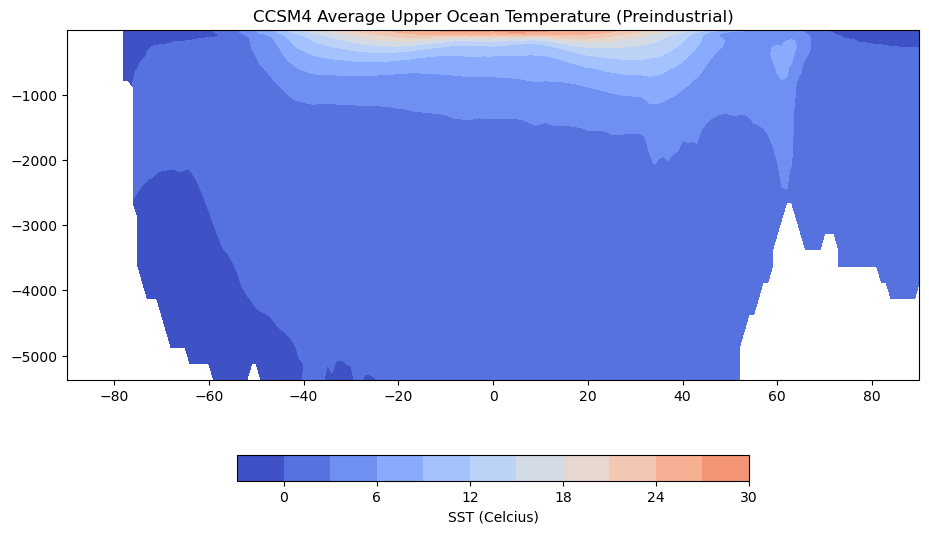

In [30]:
# Plotting
plot_slice(
    ds18.lat,
    -ds18['lev'],
    ds18['TEMP'][:,:, :].mean(dim='lon'),
    title="CCSM4 Average Upper Ocean Temperature (Preindustrial)"
)

# #19 CESM 1.2 (b.e12)Annual Mean Preindustrial Control Upper Ocean Temperature

In [31]:
# Setting the file path and name
path19 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname19 = 'CESM1.2_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds19 = xr.open_dataset(path19 + fname19)

# Rename variable z_t to lev
ds19 = ds19.rename({'z_t': 'lev'})
ds19

<xarray.Dataset>
Dimensions:  (lev: 60, lat: 181, lon: 360)
Coordinates:
    time     float64 ...
  * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

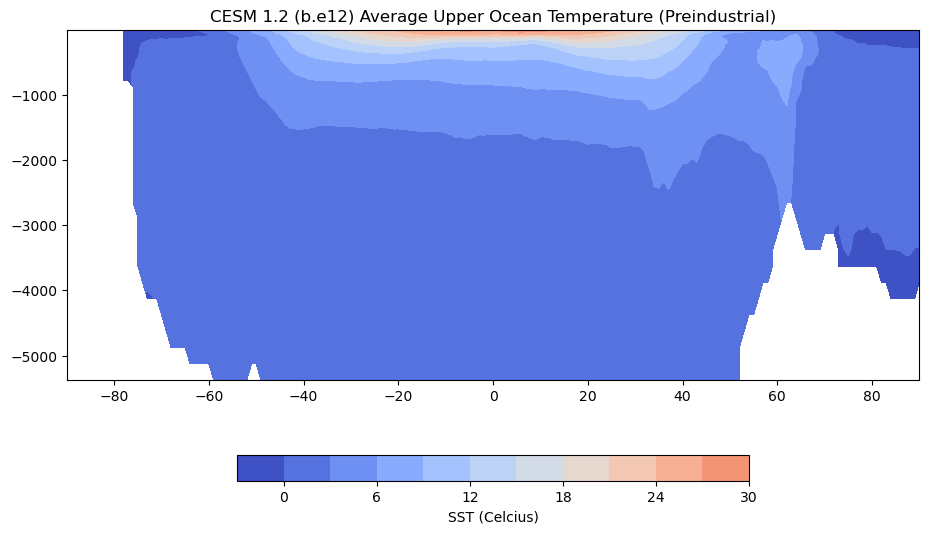

In [32]:
# Plotting
plot_slice(
    ds19.lat,
    -ds19['lev'],
    ds19['TEMP'][:,:, :].mean(dim='lon'),
    title="CESM 1.2 (b.e12) Average Upper Ocean Temperature (Preindustrial)"
)

## #20 CESM2 (b.e21)Annual Mean Preindustrial Control Upper Ocean Temperature

In [33]:
# Setting the file path and name
path20 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname20 = 'CESM2_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds20 = xr.open_dataset(path20 + fname20)

# Rename variable z_t to lev
ds20 = ds20.rename({'z_t': 'lev'})
ds20

<xarray.Dataset>
Dimensions:  (lev: 60, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.0 ... 4.875e+03 5.125e+03 5.375e+03
    time     object ...
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

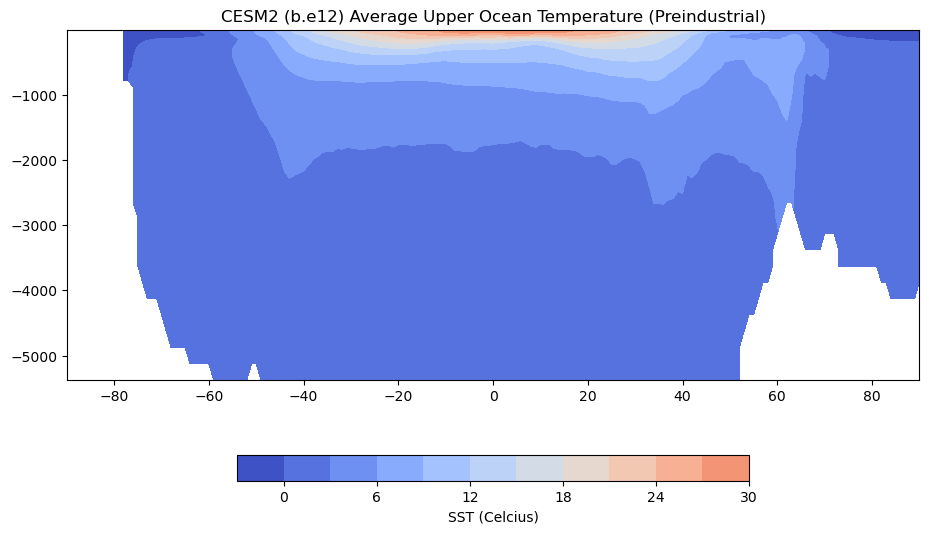

In [34]:
# Plotting
plot_slice(
    ds20.lat,
    -ds20['lev'],
    ds20['TEMP'][:,:, :].mean(dim='lon'),
    title="CESM2 (b.e12) Average Upper Ocean Temperature (Preindustrial)"
)

## #21 COSMOS Annual Mean Preindustrial Control Upper Ocean Temperature

In [36]:
# Setting the file path and name
path21 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname21 = 'COSMOS_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds21 = xr.open_dataset(path21 + fname21)

# Rename variable z_t to lev
ds21 = ds21.rename({'plev': 'lev','thetao': 'TEMP'})
ds21

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 6.0 17.0 27.0 37.0 ... 4.67e+03 5.17e+03 5.72e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

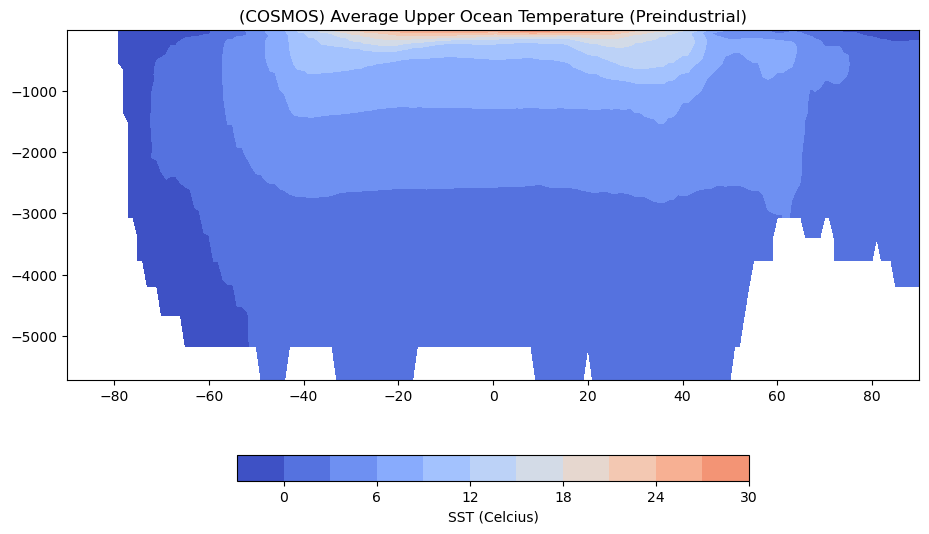

In [37]:
# Plotting
plot_slice(
    ds21.lat,
    -ds21['lev'],
    ds21['TEMP'][:,:, :].mean(dim='lon'),
    title="(COSMOS) Average Upper Ocean Temperature (Preindustrial)"
)

## #22 Earth 3.3 Annual Mean Preindustrial Control Upper Ocean Temperature

In [38]:
# Setting the file path and name
path22 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname22 = 'EC_Earth3.3_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds22 = xr.open_dataset(path22 + fname22)

# Rename variable z_t to lev
ds22 = ds22.rename({'olevel': 'lev','thetao': 'TEMP'})
ds22

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

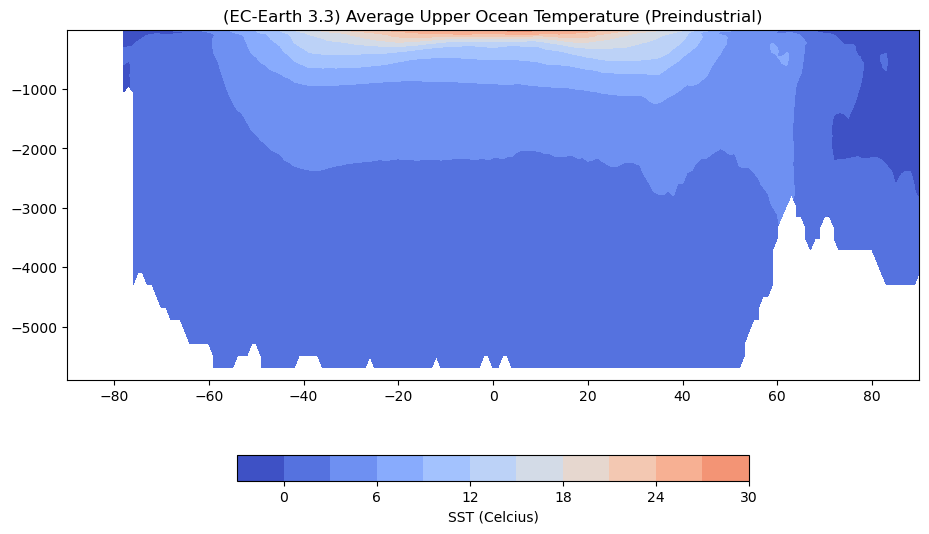

In [39]:
# Plotting
plot_slice(
    ds22.lat,
    -ds22['lev'],
    ds22['TEMP'][:,:, :].mean(dim='lon'),
    title="(EC-Earth 3.3) Average Upper Ocean Temperature (Preindustrial)"
)

## #23 HADGEM3 NEW 1997 Annual Mean Preindustrial Control Upper Ocean Temperature

In [40]:
# Setting the file path and name
path23 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname23 = 'HADGEM3_NEW_1997_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds23 = xr.open_dataset(path23 + fname23)

# Rename variable z_t to lev
ds23 = ds23.rename({'level': 'lev','temp': 'TEMP'})
ds23

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

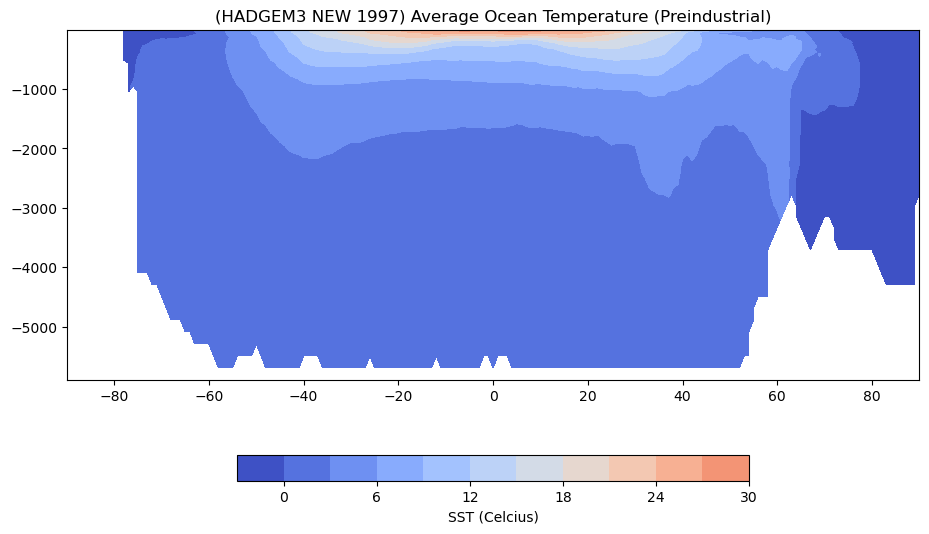

In [41]:
# Plotting
plot_slice(
    ds23.lat,
    -ds23['lev'],
    ds23['TEMP'][:,:, :].mean(dim='lon'),
    title="(HADGEM3 NEW 1997) Average Ocean Temperature (Preindustrial)"
)

## #26 MIROC 2004 Annual Mean Preindustrial Control Upper Ocean Temperature

In [42]:
# Setting the file path and name
path26 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname26 = 'MIROC4_2004_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds26 = xr.open_dataset(path26 + fname26)

# Rename variable z_t to lev
ds26 = ds26.rename({'depth': 'lev','temp': 'TEMP'})
ds26

<xarray.Dataset>
Dimensions:  (lev: 25, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 2.5 7.5 12.5 17.5 22.5 ... 550.0 675.0 825.0 975.0
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

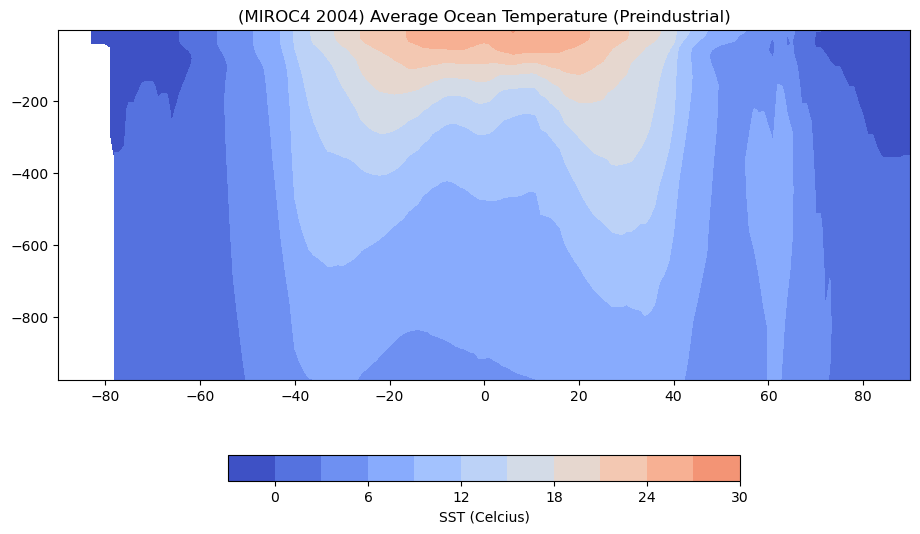

In [43]:
# Plotting
plot_slice(
    ds26.lat,
    -ds26['lev'],
    ds26['TEMP'][:,:, :].mean(dim='lon'),
    title="(MIROC4 2004) Average Ocean Temperature (Preindustrial)"
)

## #29 Utrecht CESM 1.0.5 Annual Mean Preindustrial Control Upper Ocean Temperature

In [44]:
# Setting the file path and name
path29 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname29 = 'Utrecht_CESM1.0.5_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds29 = xr.open_dataset(path29 + fname29)

# Rename variable z_t to lev
ds29 = ds29.rename({'z_t': 'lev','temp': 'TEMP'})
ds29

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 500.0 1.5e+03 2.5e+03 ... 8.788e+04 9.847e+04
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

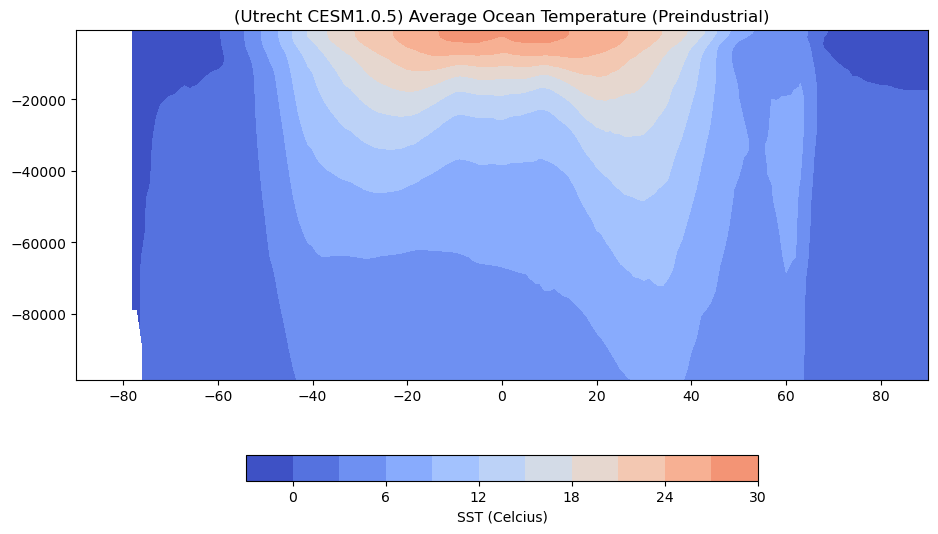

In [45]:
# Plotting
plot_slice(
    ds29.lat,
    -ds29['lev'],
    ds29['TEMP'][:,:, :].mean(dim='lon'),
    title="(Utrecht CESM1.0.5) Average Ocean Temperature (Preindustrial)"
)

## #30 LEEDS Annual Mean Preindustrial Upper Ocean Temperature

In [8]:
# Setting the file path and name
path30 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname30 = 'LEEDS_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds30 = xr.open_dataset(path30 + fname30)

# Rename variable z_t to lev
ds30 = ds30.rename({'depth_1': 'lev','temp': 'TEMP'})
ds30

<xarray.Dataset>
Dimensions:  (lev: 20, lon: 360, lat: 181)
Coordinates:
  * lev      (lev) float32 5.0 15.0 25.0 35.1 ... 3.962e+03 4.577e+03 5.192e+03
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
Data variables:
    TEMP     (lev, lat, lon) float64 ...

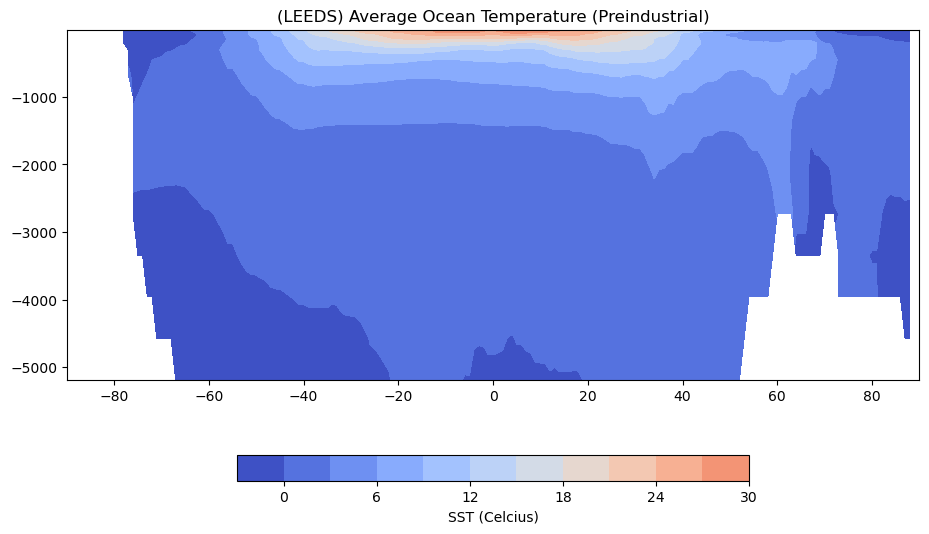

In [9]:
# Plotting
plot_slice(
    ds30.lat,
    -ds30['lev'],
    ds30['TEMP'][:,:, :].mean(dim='lon'),
    title="(LEEDS) Average Ocean Temperature (Preindustrial)"
)

## #31 IPSLCM6A_LR Annual Mean Preindustrial Control Upper Ocean Temperature 

In [46]:
# Setting the file path and name
path31 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname31 = 'IPSLCM6A_LR_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds31 = xr.open_dataset(path31 + fname31)

# Rename variable z_t to lev
ds31 = ds31.rename({'olevel': 'lev','temp': 'TEMP'})
ds31

<xarray.Dataset>
Dimensions:  (lev: 75, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float32 0.5058 1.556 2.668 ... 5.495e+03 5.698e+03 5.902e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

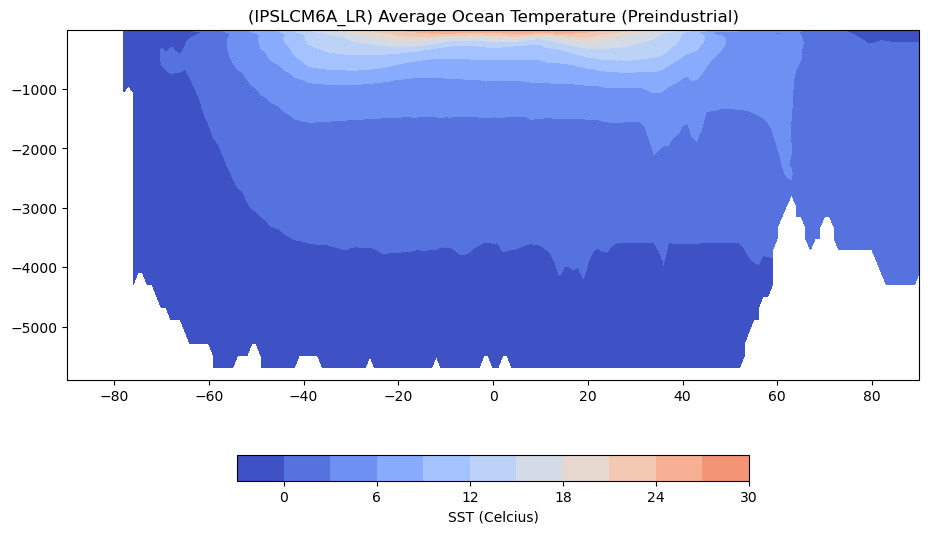

In [47]:
# Plotting
plot_slice(
    ds31.lat,
    -ds31['lev'],
    ds31['TEMP'][:,:, :].mean(dim='lon'),
    title="(IPSLCM6A_LR) Average Ocean Temperature (Preindustrial)"
)

## #32 GISS Annual Mean Preindustrial Control Upper Ocean Temperature

In [16]:
# Setting the file path and name
path32 = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
fname32 = 'GISS_pi.nc'

# Open the dataset using xarray and concatenate the dimensions
ds32 = xr.open_dataset(path32 + fname32)
ds32

<xarray.Dataset>
Dimensions:  (lev: 40, lat: 181, lon: 360)
Coordinates:
  * lev      (lev) float64 5.0 16.0 29.0 44.0 ... 4.453e+03 4.675e+03 4.897e+03
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) int64 0 1 2 3 4 5 6 7 8 ... 352 353 354 355 356 357 358 359
Data variables:
    TEMP     (lev, lat, lon) float32 ...

In [18]:
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'
file_name = 'GISS_pi.nc'
file_path = output_path + file_name

ds32.to_netcdf(file_path)

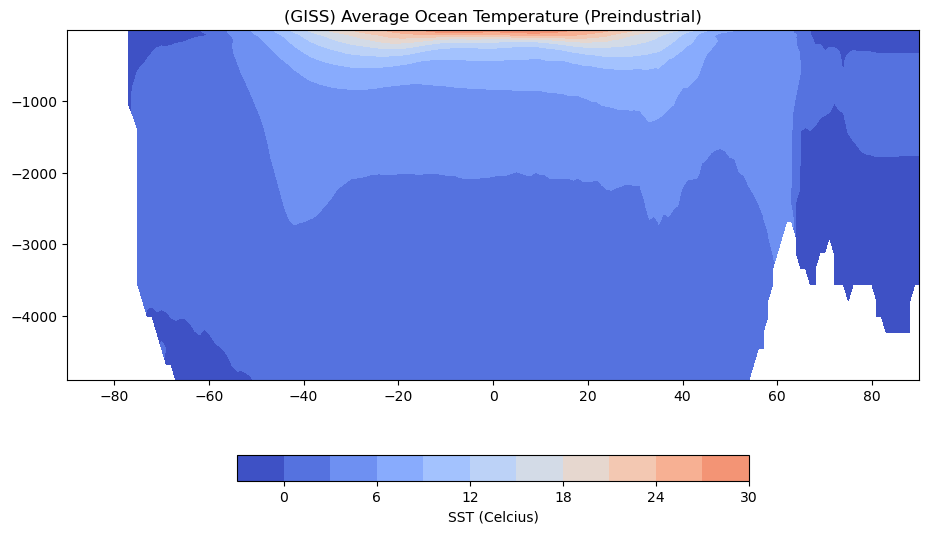

In [51]:
# Plotting
plot_slice(
    ds32.lat,
    -ds32['lev'],
    ds32['TEMP'][:,:, :].mean(dim='lon'),
    title="(GISS) Average Ocean Temperature (Preindustrial)"
)

## Saving Manipulated Files

In [52]:
file_name = [
    'CCSM4_plio.nc',
    'CESM1.2_plio.nc',
    'CESM2_plio.nc',
    'COSMOS_plio.nc',
    'EC_Earth3.3_plio.nc',
    'HADGEM3_NEW_1997_plio.nc',
    'MIROC4_2004_plio.nc',
    'Utrecht_CESM1.0.5_plio.nc',
    'IPSLCM6A_LR_plio.nc',
    'GISS_plio.nc',
    'CCSM4_pi.nc',
    'CESM1.2_pi.nc',
    'CESM2_pi.nc',
    'COSMOS_pi.nc',
    'EC_Earth3.3_pi.nc',
    'HADGEM3_NEW_1997_pi.nc',
    'MIROC4_2004_pi.nc',
    'Utrecht_CESM1.0.5_pi.nc',
    'IPSLCM6A_LR_pi.nc',
    'GISS_pi.nc',
]

file_list = [
    ds1,
    ds2,
    ds3,
    ds4,
    ds5,
    ds6,
    ds9,
    ds13,
    ds16,
    ds17,
    ds18,
    ds19,
    ds20,
    ds21,
    ds22,
    ds23,
    ds26,
    ds29,
    ds31,
    ds32,
]
output_path = '/glade/u/home/nwrye/OceanTemps_Compiles/slicefiles/'

In [55]:
# Loop over the file_list and save each file with the corresponding file_name
for i in range(len(file_list)):
    file_path = output_path + file_name[i]
    if not os.path.exists(file_path):
        file_list[i].to_netcdf(file_path)
    else:
        print(f"Skipping file {file_path} as it already exists.")